(In order to load the stylesheet of this notebook, execute the last code cell in this notebook)

# Clustering the data from the Mayor's 24-hour hotline in Boston

## Introduction 

In this assignment, we will do a clustering analysis on the 311 calls that we used in the previous homework. We will focus on choosing a value for k, clustering based on multiple features and detecting outliers.

---------------------------

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
boston = pd.read_csv('../Homework-2/cases_2015.csv')

## Step 1. Simple clustering

The first thing that we will try is to cluster the geolocation data of the calls. The geolocation of a record consists of a pair `(latitude, longitude)`, which represents the position of the record on the map. Since the dataset that we have spans only a small geographic location, i.e. Boston, we will use the Euclidean distance when measuring how close two points are. Techinically, we should pick a [projection](https://github.com/mbostock/d3/wiki/Geo-Projections) in order to transform the data into 2d, and measure  the Euclidean distance in the projected space.

Since we are dealing with numeric data, we might consider centering and normalizing them. In order to do that, check the [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) from `scikit-learn`.

For exampe, the result of a clustering with 10 clusters is the following:


![A clustering of the locations of the calls for k=10](clusters10.png)

Filter the dataset to get the latitude and longitude, transform it as required and run the k-means clustering algorithm. Argue about the number of clusters you used. **(pts 50)**

(1, 93395.999999997468)
(2, 48237.807863858208)
(3, 32112.644008576903)
(4, 21165.077494641682)
(5, 16350.434016239486)
(6, 13546.434798280889)
(7, 11381.447033610519)
(8, 9626.7668999870857)
(9, 7814.6984440073302)
(10, 6838.9803505599893)
(11, 5933.0569920327507)
(12, 5275.586325841482)
(13, 4882.6644789418297)
(14, 4480.6292974227554)
(15, 4140.0348611095096)
(16, 3832.1382217898845)
(17, 3459.0724093909657)
(18, 3181.1314515000195)
(19, 3018.4822010957178)
(20, 2833.2285655588798)
(21, 2669.8340966294531)
(22, 2567.646493956423)
(23, 2424.2764341302559)
(24, 2280.1891173777062)
(25, 2208.3700427226586)
(26, 2086.4876696551391)
(27, 1999.8282518740411)
(28, 1897.9844608629494)
(29, 1854.7255679957059)
(30, 1773.7747996959001)


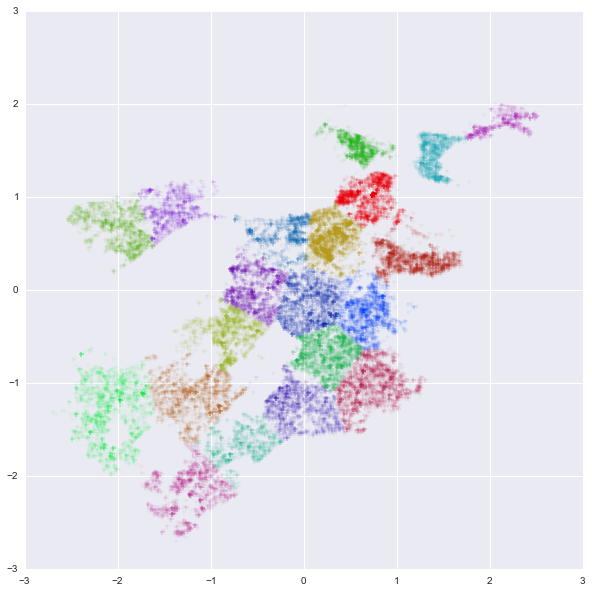

In [20]:
import numpy as np
import scipy as sp
import sklearn.datasets as sd
import sklearn.metrics as sm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler as std

data = std().fit_transform(np.array(boston[['LATITUDE','LONGITUDE']]))

# Find the most suitable K value
def findK(data,K):
    count = 0
    for k in range(1,K+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        error = kmeans.fit_predict(data)
        error = kmeans.inertia_
        count = count + 1
        print (count, error)
        
# run the following to see the error rate regarding to k values
# we might see the error rate reaches convergence when k = 20
# run the findK() takes a couple of minutes when k is set to large number
# comment the following line to save time
findK(data,30)




# the code below is from piazza page, thanks to Harry
fig, ax = plt.subplots(1,1,figsize=(10,10))
cmap = sns.color_palette("bright", n_colors=4)
cmap.extend(sns.hls_palette(n_colors=16, h=0.7, l=0.4, s=0.8))
X = std().fit_transform(np.array(boston['LONGITUDE']))
Y = std().fit_transform(np.array(boston['LATITUDE']))
for i, label in enumerate(set(labels)):
    point_indices = np.where(labels == label)[0]
    point_indices = point_indices.tolist()
    plt.scatter(X[point_indices], Y[point_indices], s=25, alpha=0.2, c=cmap[i], marker='+')

-----

## Step 2. Using multiple features

The next step in our analysis is to use more features than just the geolocation of a record (whose clustering only gives us information about the neighborhoods, which should not be a huge revelation!) Filter the dataset to get more features, transform them as required and compute another clustering. You should argue about the quality of your clustering and use domain knowledge (i.e. the fact that you are locals) to explore the clusters you produced and present them to the reader. **(pts 30)**

In [22]:
boston.columns

Index([u'CASE_ENQUIRY_ID', u'OPEN_DT', u'TARGET_DT', u'CLOSED_DT', u'OnTime_Status', u'CASE_STATUS', u'CLOSURE_REASON', u'CASE_TITLE', u'SUBJECT', u'REASON', u'TYPE', u'QUEUE', u'Department', u'SubmittedPhoto', u'ClosedPhoto', u'Location', u'fire_district', u'pwd_district', u'city_council_district', u'police_district', u'neighborhood', u'neighborhood_services_district', u'ward', u'precinct', u'land_usage', u'LOCATION_STREET_NAME', u'LOCATION_ZIPCODE', u'Property_Type', u'Property_ID', u'LATITUDE', u'LONGITUDE', u'Source', u'Geocoded_Location'], dtype='object')

-----

## Step 3. Detecting outliers

Now that we have a clustering of the records in the dataset, we can detect the outlying ones. These are the ones who are the farthest from the centroids of their clusters. Track them down and describe any interesting observations that you can make. **(pts 20)** 

In [21]:
# Code for setting the style of the notebook
from IPython.core.display import HTML
def css_styling():
    styles = open("../../theme/custom.css", "r").read()
    return HTML(styles)
css_styling()